#GRIP @ THE SPARKS FOUNDATION

---



##INTERNSHIP TASK-6

# Prediction using Decision Tree Algorithm

##By Samarth Agarwal

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Importing libraries 
import sklearn.datasets as datasets
import pandas as pd


In [5]:
# Loading the iris dataset
iris=datasets.load_iris()

In [7]:

# Forming the iris dataframe of variables
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
x=df.values

In [10]:
label=iris.target
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
# std-standard deviation
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


##Splitting data into train and test data

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, label, test_size=0.2,shuffle=True)

## Importing & modeling the decision tree classifier

In [88]:
# Defining the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy", max_depth = 5)   #max depth is the height set for decision tree formed
dtree.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [89]:
y_pred=dtree.predict(x_test)

In [90]:
print(f'the accuracy of training set is {dtree.score(x_train,y_train)}')
print(f'the accuracy of test set is {dtree.score(x_test,y_test)}')

the accuracy of training set is 1.0
the accuracy of test set is 0.9666666666666667


#Visualisation

In [82]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import numpy as np
%matplotlib inline 

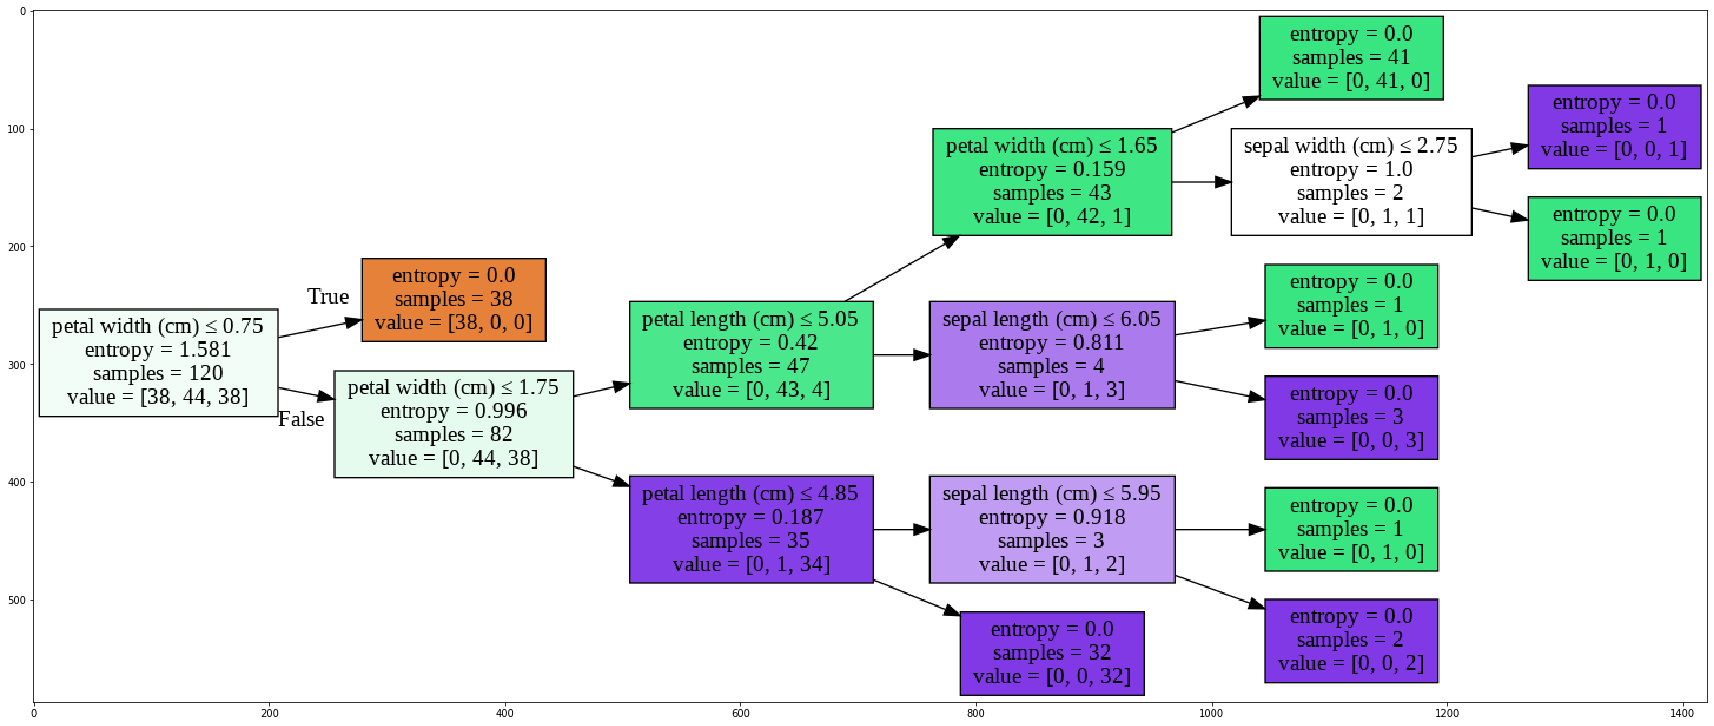

In [84]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:4]
out=tree.export_graphviz(dtree,feature_names=iris.feature_names, out_file=dot_data, filled=True,  special_characters=True,rotate=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(30, 27))
plt.imshow(img,interpolation='nearest')